In [60]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)
#!pip install astroquery
from astroquery.gaia import Gaia

tables=Gaia.load_tables(only_names=True)
for table in tables:
  print(table.name)

from astroquery.gaia import Gaia



INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.apassdr9
external.catwise2020
external.gaiadr2_astrophysical_parameters
external.gaiadr2_geometric_distance
external.gaiaedr3_distance
external.gaiaedr3_gcns_main_1
external.gaiaedr3_gcns_rejected_1
external.gaiaedr3_spurious
external.gaia_eso_survey
external.galex_ais
external.ravedr5_com
external.ravedr5_dr5
external.ravedr5_gra
external.ravedr5_on
external.ravedr6
external.sdssdr13_photoprimary
external.skymapperdr1_master
external.skymapperdr2_master
external.tmass_xsc
external.xgboost_table1
external.xgboost_table2
gaiadr1.aux_qso_icrf2_match
gaiadr1.ext_phot_zero_point
gaiadr1.allwise_best_neighbour
gaiadr1.allwise_neighbourhood
gaiadr1.gsc23_best_neighbour
gaiadr1.gsc23_neighbourhood
gaiadr1.ppmxl_best_neighbour
gaiadr1.ppmxl_neighbourhood
gaiadr1.sdss_dr9_best_neighbour
gaiadr1.sdss_dr9_neighbourhood
gaiadr1.tmass_best_neigh

# select 
TOP 4000
gaia.source_id, gaia.ra, gaia.dec, gaia.parallax, gaia.parallax_error, gaia.pmra, gaia.pmra_error,
gaia.pmdec, gaia.pmdec_error, gaia.parallax_pmra_corr, gaia.parallax_pmdec_corr, gaia.pmra_pmdec_corr, 
gaia.radial_velocity, gaia.radial_velocity_error, gaia.rv_template_teff, gaia.grvs_mag, 
gaia.phot_g_mean_mag, gaia.bp_rp, gaia.g_rp, gaia.bp_g, gaia.b,gaia.l,gaia.ra_error,gaia.dec_error,
gaia.ag_gspphot, gaia.ebpminrp_gspphot, gaia.teff_gspphot, gaia.logg_gspphot,
aps.teff_esphs, aps.logg_esphs, aps.ag_esphs, aps.ebpminrp_esphs, aps.spectraltype_esphs,vcpd.source_id
from gaiadr3.vari_cepheid as vcpd
join gaiadr3.astrophysical_parameters as aps
using (source_id)
join gaiadr3.gaia_source as gaia
using (source_id)


WHERE 1=CONTAINS(
  POINT(ra, dec),
  CIRCLE(0.00350, 89.98106,89.75))
  AND abs(pmra_error/pmra)<7
  AND abs(pmdec_error/pmdec)<7
  AND pmra IS NOT NULL AND abs(pmra)>0
  AND pmdec IS NOT NULL AND abs(pmdec)>0

In [61]:
query1 = """

  
select 
TOP 4000
gaia.source_id, gaia.ra, gaia.dec, gaia.parallax, gaia.parallax_error, gaia.pmra, gaia.pmra_error,
gaia.pmdec, gaia.pmdec_error, gaia.parallax_pmra_corr, gaia.parallax_pmdec_corr, gaia.pmra_pmdec_corr, 
gaia.radial_velocity, gaia.radial_velocity_error, gaia.rv_template_teff, gaia.grvs_mag, 
gaia.phot_g_mean_mag, gaia.bp_rp, gaia.g_rp, gaia.bp_g, gaia.b,gaia.l,gaia.ra_error,gaia.dec_error,
gaia.ag_gspphot, gaia.ebpminrp_gspphot, gaia.teff_gspphot, gaia.logg_gspphot,
aps.teff_esphs, aps.logg_esphs, aps.ag_esphs, aps.ebpminrp_esphs, aps.spectraltype_esphs,vcpd.source_id
from gaiadr3.vari_cepheid as vcpd
join gaiadr3.astrophysical_parameters as aps
using (source_id)
join gaiadr3.gaia_source as gaia
using (source_id)


WHERE 1=CONTAINS(
  POINT(ra, dec),
  CIRCLE(0.00350, 89.98106,89.75))
  AND abs(pmra_error/pmra)<7
  AND abs(pmdec_error/pmdec)<7
  AND pmra IS NOT NULL AND abs(pmra)>0
  AND pmdec IS NOT NULL AND abs(pmdec)>0

  

"""

# Execute the query
job1 = Gaia.launch_job(query1)
results1 = job1.get_results()
results1


SOURCE_ID,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,radial_velocity,radial_velocity_error,rv_template_teff,grvs_mag,phot_g_mean_mag,bp_rp,g_rp,bp_g,b,l,ra_error,dec_error,ag_gspphot,ebpminrp_gspphot,teff_gspphot,logg_gspphot,teff_esphs,logg_esphs,ag_esphs,ebpminrp_esphs,spectraltype_esphs,source_id
,deg,deg,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,,,km / s,km / s,K,mag,mag,mag,mag,mag,deg,deg,mas,mas,mag,mag,K,log(cm.s**-2),K,log(cm.s**-2),mag,mag,,
int64,float64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,object,int64
61259706956316800,51.01792454797804,21.229115874567995,0.007954650989392204,0.054860674,0.1081761334819584,0.062117815,-1.526322410260946,0.047916014,0.25470576,0.09095745,0.16590275,--,--,--,--,16.170671,1.4089127,0.81461525,0.5942974,-29.15688669598451,164.19172132036448,0.047776386,0.03596122,--,--,--,--,--,--,--,--,F,61259706956316800
154255575798532096,71.7780292883834,26.17929339138009,0.7603146670761279,0.036302775,2.561135132440622,0.046412792,-4.794018808046895,0.032826964,0.22722565,0.15904474,0.10034942,--,--,--,--,9.297068,2.0693312,1.0624895,1.0068417,-12.190197447756892,174.773835200473,0.034420367,0.01691458,1.8808,1.0046,5205.4106,1.7145,--,--,--,--,K,154255575798532096
174489098011145216,71.94298042330281,36.72278112167541,1.0566163862524083,0.028701555,0.2846638858612442,0.03129801,-1.3696756676523318,0.023141488,-0.24383427,0.26975894,0.1195048,12.286932,2.4587975,5000.0,5.9419837,7.085648,1.4846635,0.80060863,0.68405485,-5.385878519793774,166.61765513134935,0.023307756,0.013344721,1.2563,0.6817,5650.472,1.5215,--,--,--,--,F,174489098011145216
175811260743708672,65.44005930160026,34.06980678678192,0.11141440167138295,0.022758543,0.23265710177758636,0.025501572,-0.4453437835893871,0.019712195,0.17926994,0.053432625,0.02524032,-34.755367,5.7780433,6250.0,12.680192,13.649755,1.1470041,0.6568842,0.49011993,-11.100403665899368,165.0321922651587,0.01894913,0.014175394,--,--,--,--,--,--,--,--,A,175811260743708672
180464393952709504,78.45410143446728,31.241528914459366,0.21911237847007378,0.020837184,0.7447620980670216,0.021512073,-0.5330095171755516,0.015226302,0.14488035,0.4021582,-0.12556675,-10.691541,4.228356,6750.0,12.767232,13.963971,1.4539251,0.7998228,0.6541023,-4.468666728447342,174.28093641211385,0.018137272,0.010310667,--,--,--,--,--,--,--,--,F,180464393952709504
181620805307496192,76.98162278735626,33.05658750891498,0.08547562695793764,0.024270382,0.10079579534964911,0.029190466,-0.8071821209736953,0.019523801,0.13290688,0.15484175,0.09676451,6.8791404,11.517301,5500.0,13.37188,14.620964,1.5224934,0.81905746,0.7034359,-4.4068989939190875,172.07327810286375,0.021466909,0.011318415,--,--,--,--,--,--,--,--,F,181620805307496192
182823464871591808,81.51843327804244,34.433874358037855,0.14040115712095827,0.06701241,0.3822504976618701,0.07724038,-0.7650210635123948,0.059213217,-0.044899017,0.36790472,-0.2581056,--,--,--,--,16.454065,2.0357447,1.0157595,1.0199852,-0.5325149140274921,173.12963723663873,0.055821467,0.04048541,--,--,--,--,--,--,--,--,B,182823464871591808
183814674602852480,79.70854159965441,35.30913467364034,0.1647697958715106,0.026044171,0.2799382745850243,0.028271068,-0.5808031837572256,0.022557259,-0.076511666,0.23885067,-0.0027173404,-23.509409,3.549812,5500.0,12.789186,14.398995,2.427905,1.1213465,1.3065586,-1.2596768770420557,171.56671954219576,0.021853914,0.017953854,4.0312,2.254,7686.204,2.567,--,--,--,--,B,183814674602852480


In [62]:
print(max(results1['l']),min(results1['l']))
print(max(results1['b']),min(results1['b']))
a=np.array( results1['radial_velocity'])
nan_count = np.isnan(a).sum()
print('Total Radial velocity fetched =')
print({len(results1['radial_velocity'])-nan_count})

357.78034131360175 3.75801274542445
86.99430998936352 -52.03650172368281
Total Radial velocity fetched =
{1127}


In [63]:
import astropy.coordinates as coord
import astropy.units as u
import numpy as np

# Define arrays of parameters
ra_array = np.array(results1['ra']) * u.degree
dec_array = np.array(results1['dec']) * u.degree
distance_array = (np.array(results1['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(results1['pmra']) * u.mas / u.yr
pm_dec_array = np.array(-results1['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(results1['radial_velocity']) * u.km / u.s

ra_error=np.array(results1['ra_error']) * u.degree
dec_error=np.array(results1['dec_error']) * u.degree
distance_error=(np.array(results1['parallax_error']) * u.mas).to(u.kpc, u.parallax())
radial_velocity_error=np.array(results1['radial_velocity_error']) * u.km / u.s
pm_ra_error=np.array(results1['pmra_error']) * u.mas / u.yr
pm_dec_error=np.array(results1['pmdec_error']) * u.mas / u.yr

# Create SkyCoord object with arrays
c1 = coord.SkyCoord(
    ra=ra_array,
    dec=dec_array,
    distance=distance_array,
    pm_ra_cosdec=pm_ra_cosdec_array,
    pm_dec=pm_dec_array,
    radial_velocity=radial_velocity_array,
    frame="icrs",
)

# Transform to Galactocentric frame
gc1 = c1.transform_to(coord.Galactocentric)
gc1.x
# Print the Galactocentric velocities
ra_array[2]


<Quantity 71.94298042 deg>

In [64]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
ra_array = np.array(results1['ra']) * u.degree
dec_array = np.array(results1['dec']) * u.degree
distance_array = (np.array(results1['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(results1['pmra']) * u.mas / u.yr
pm_dec_array = np.array(-results1['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(results1['radial_velocity']) * u.km / u.s
radial_velocity_error=np.array(results1['radial_velocity_error']) * u.km / u.s
pm_ra_error=np.array(results1['pmra_error']) * u.mas / u.yr
pm_dec_error=np.array(results1['pmdec_error']) * u.mas / u.yr


# Function to transform coordinates
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
    c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity, frame='icrs')
    g = c.transform_to(Galactocentric())
    return np.array([g.v_x.value, g.v_y.value, g.v_z.value])

# Arrays to store the results
vx_nominal = []
vy_nominal = []
vz_nominal = []
sigma_vx = []
sigma_vy = []
sigma_vz = []

# Loop through each set of inputs
for i in range(len(ra_array)):
    ra = ra_array[i]
    dec = dec_array[i]
    distance = distance_array[i]
    pm_ra_cosdec = pm_ra_cosdec_array[i]
    pm_dec = pm_dec_array[i]
    radial_velocity = radial_velocity_array[i]

    sigma_pm_ra_cosdec = pm_ra_error[i]
    sigma_pm_dec = pm_dec_error[i]
    sigma_radial_velocity = radial_velocity_error[i]

    # Evaluate the function at the nominal values
    v_x_nom, v_y_nom, v_z_nom = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity)

    # Numerically compute the Jacobian matrix
    epsilon = 1e-5
    jacobian = np.zeros((3, 3))

    # Partial derivatives with respect to radial velocity
    v_eps = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity + epsilon * u.km / u.s)
    jacobian[:, 0] = (np.array(v_eps) - np.array([v_x_nom, v_y_nom, v_z_nom])) / epsilon

    # Partial derivatives with respect to proper motion in ra
    v_eps = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec + epsilon * u.mas / u.yr, pm_dec, radial_velocity)
    jacobian[:, 1] = (np.array(v_eps) - np.array([v_x_nom, v_y_nom, v_z_nom])) / epsilon

    # Partial derivatives with respect to proper motion in dec
    v_eps = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec + epsilon * u.mas / u.yr, radial_velocity)
    jacobian[:, 2] = (np.array(v_eps) - np.array([v_x_nom, v_y_nom, v_z_nom])) / epsilon

    # Construct the input covariance matrix
    cov_matrix_input = np.diag([sigma_radial_velocity.value**2, sigma_pm_ra_cosdec.value**2, sigma_pm_dec.value**2])

    # Transform the covariance matrix
    cov_matrix_output = jacobian @ cov_matrix_input @ jacobian.T

    # The propagated uncertainties are the square roots of the diagonal elements
    sigma_v_x, sigma_v_y, sigma_v_z = np.sqrt(np.diag(cov_matrix_output))

    # Store the results
    vx_nominal.append(v_x_nom)
    vy_nominal.append(v_y_nom)
    vz_nominal.append(v_z_nom)
    sigma_vx.append(sigma_v_x)
    sigma_vy.append(sigma_v_y)
    sigma_vz.append(sigma_v_z)

# Convert results to arrays for easier handling
vx_nominal = np.array(vx_nominal)
vy_nominal = np.array(vy_nominal)
vz_nominal = np.array(vz_nominal)
sigma_vx = np.array(sigma_vx)
sigma_vy = np.array(sigma_vy)
sigma_vz = np.array(sigma_vz)

# Print the results
#for i in range(len(ra_array)):
#    print(f"Star {i+1}: Galactocentric velocities: v_x = {vx_nominal[i]:.2f} ± {sigma_vx[i]:.2f} km/s, v_y = {vy_nominal[i]:.2f} ± {sigma_vy[i]:.2f} km/s, v_z = {vz_nominal[i]:.2f} ± {sigma_vz[i]:.2f} km/s")


In [65]:
sigma_vx**2

array([       nan,        nan, 5.67527371, ..., 2.51017362,        nan,
       0.87827537])

In [66]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
from astropy.table import Table
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
ra_array = np.array(results1['ra']) * u.degree
dec_array = np.array(results1['dec']) * u.degree
distance_array = (np.array(results1['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(results1['pmra']) * u.mas / u.yr
pm_dec_array = np.array(-results1['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(results1['radial_velocity']) * u.km / u.s
radial_velocity_error=np.array(results1['radial_velocity_error']) * u.km / u.s
pm_ra_error=np.array(results1['pmra_error']) * u.mas / u.yr
pm_dec_error=np.array(results1['pmdec_error']) * u.mas / u.yr

# Function to transform coordinates to galactocentric velocities
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
    c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity, frame='icrs')
    g = c.transform_to(Galactocentric())
    return np.array([g.v_x.value, g.v_y.value, g.v_z.value]), g

# Function to transform galactocentric velocities to cylindrical velocities
def galactocentric_to_cylindrical(g, vx, vy, vz):
    X = g.x.value
    Y = g.y.value
    Z = g.z.value
    phi = np.arctan2(Y, X)
    theta = (np.pi/2) - np.arctan2(Z, np.sqrt(X**2 + Y**2))
    R = np.sqrt(X**2 + Y**2 + Z**2)

    V_phi = vx * np.sin(phi) - vy * np.cos(phi)
    V_r = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.sin(theta)) + vz * np.cos(theta)
    V_theta = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.cos(theta)) - vz * np.sin(theta)
    
    return np.array([V_phi, V_r, V_theta])

# Arrays to store the results
V_phi_nominal = []
V_r_nominal = []
V_theta_nominal = []
sigma_V_phi = []
sigma_V_r = []
sigma_V_theta = []
R_nominal = []

# Loop through each set of inputs
for i in range(len(ra_array)):
    ra = ra_array[i]
    dec = dec_array[i]
    distance = distance_array[i]
    pm_ra_cosdec = pm_ra_cosdec_array[i]
    pm_dec = pm_dec_array[i]
    radial_velocity = radial_velocity_array[i]

    sigma_pm_ra_cosdec =sigma_vx[i]
    sigma_pm_dec = sigma_vy[i]
    sigma_radial_velocity = sigma_vz[i]

    # Evaluate the function at the nominal values
    (v_x_nom, v_y_nom, v_z_nom), g = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity)
    V_nom = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom, v_z_nom)
    V_phi_nom, V_r_nom, V_theta_nom = V_nom
    
    # Numerically compute the Jacobian matrix
    epsilon = 1e-5
    jacobian = np.zeros((3, 3))

    # Partial derivatives with respect to v_x
    V_eps = galactocentric_to_cylindrical(g, v_x_nom + epsilon, v_y_nom, v_z_nom)
    jacobian[:, 0] = (V_eps - V_nom) / epsilon

    # Partial derivatives with respect to v_y
    V_eps = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom + epsilon, v_z_nom)
    jacobian[:, 1] = (V_eps - V_nom) / epsilon

    # Partial derivatives with respect to v_z
    V_eps = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom, v_z_nom + epsilon)
    jacobian[:, 2] = (V_eps - V_nom) / epsilon

    # Construct the input covariance matrix
    cov_matrix_input = np.diag([sigma_radial_velocity**2, sigma_pm_ra_cosdec**2, sigma_pm_dec**2])

    # Transform the covariance matrix
    cov_matrix_output = jacobian @ cov_matrix_input @ jacobian.T

    # The propagated uncertainties are the square roots of the diagonal elements
    sigma_V_phi_i, sigma_V_r_i, sigma_V_theta_i = np.sqrt(np.diag(cov_matrix_output))

    # Store the results
    V_phi_nominal.append(V_phi_nom)
    V_r_nominal.append(V_r_nom)
    V_theta_nominal.append(V_theta_nom)
    sigma_V_phi.append(sigma_V_phi_i)
    sigma_V_r.append(sigma_V_r_i)
    sigma_V_theta.append(sigma_V_theta_i)

# Convert results to arrays for easier handling
V_phi_nominal = np.array(V_phi_nominal)
V_r_nominal = np.array(V_r_nominal)
V_theta_nominal = np.array(V_theta_nominal)
sigma_V_phi = np.array(sigma_V_phi)
sigma_V_r = np.array(sigma_V_r)
sigma_V_theta = np.array(sigma_V_theta)

# Print the results
#for i in range(len(ra_array)):
   # print(f"Star {i+1}: Cylindrical velocities: V_phi = {V_phi_nominal[i]:.2f} ± {sigma_V_phi[i]:.2f} km/s, V_r = {V_r_nominal[i]:.2f} ± {sigma_V_r[i]:.2f} km/s, V_theta = {V_theta_nominal[i]:.2f} ± {sigma_V_theta[i]:.2f} km/s")
table = Table([ V_phi_nominal, sigma_V_phi, V_r_nominal, sigma_V_r, V_theta_nominal, sigma_V_theta],
              names=('V_phi', 'sigma_V_phi', 'V_r', 'sigma_V_r', 'V_theta', 'sigma_V_theta'),
              units=( u.km/u.s, u.km/u.s, u.km/u.s, u.km/u.s, u.km/u.s, u.km/u.s))
table             


V_phi,sigma_V_phi,V_r,sigma_V_r,V_theta,sigma_V_theta
km / s,km / s,km / s,km / s,km / s,km / s
float64,float64,float64,float64,float64,float64
nan,nan,nan,nan,nan,nan
nan,nan,nan,nan,nan,nan
252.28744151468518,2.381598335151969,4.541803992803985,0.2639534076269732,-11.590539342439007,0.5783591047113078
248.04604053938883,5.443965811194826,-13.75850906531797,1.624780352403706,-33.07813433420338,1.729124948201591
245.31448349617398,4.19308233571545,-13.962237034362191,0.5502428051008387,-27.996420436235553,0.5651649961038215
278.93532954164635,11.341281125928043,12.803822221095322,1.915623457441713,-38.91892169614844,2.0364702459412434
nan,nan,nan,nan,nan,nan
252.99781565043318,3.5058028471036033,-21.469011490199215,0.7958155566907635,-24.275666740063016,0.8717379278353945


# use this 

In [67]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
from astropy.table import Table

# Example input arrays
ra_array = np.array(results1['ra']) * u.degree
dec_array = np.array(results1['dec']) * u.degree
distance_array = (np.array(results1['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(results1['pmra']) * u.mas / u.yr
pm_dec_array = np.array(-results1['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(results1['radial_velocity']) * u.km / u.s
radial_velocity_error=np.array(results1['radial_velocity_error']) * u.km / u.s
pm_ra_error=np.array(results1['pmra_error']) * u.mas / u.yr
pm_dec_error=np.array(results1['pmdec_error']) * u.mas / u.yr

# Function to transform coordinates to galactocentric velocities
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
    c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity, frame='icrs')
    g = c.transform_to(Galactocentric())
    return np.array([g.v_x.value, g.v_y.value, g.v_z.value]), g

# Function to transform galactocentric velocities to cylindrical velocities
def galactocentric_to_cylindrical(g, vx, vy, vz):
    X = g.x.value
    Y = g.y.value
    Z = g.z.value
    phi = np.arctan2(Y, X)
    theta = (np.pi/2) - np.arctan2(Z, np.sqrt(X**2 + Y**2))
    R = np.sqrt(X**2 + Y**2 + Z**2)

    V_phi = vx * np.sin(phi) - vy * np.cos(phi)
    V_r = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.sin(theta)) + vz * np.cos(theta)
    V_theta = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.cos(theta)) - vz * np.sin(theta)
    
    return np.array([V_phi, V_r, V_theta, R])

# Arrays to store the results
V_phi_nominal = []
V_r_nominal = []
V_theta_nominal = []
R_nominal = []
sigma_V_phi = []
sigma_V_r = []
sigma_V_theta = []

# Loop through each set of inputs
for i in range(len(ra_array)):
    ra = ra_array[i]
    dec = dec_array[i]
    distance = distance_array[i]
    pm_ra_cosdec = pm_ra_cosdec_array[i]
    pm_dec = pm_dec_array[i]
    radial_velocity = radial_velocity_array[i]

    sigma_pm_ra_cosdec =sigma_vx[i]
    sigma_pm_dec = sigma_vy[i]
    sigma_radial_velocity = sigma_vz[i]

    # Evaluate the function at the nominal values
    (v_x_nom, v_y_nom, v_z_nom), g = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity)
    V_nom = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom, v_z_nom)
    V_phi_nom, V_r_nom, V_theta_nom, R_nom = V_nom
    
    # Numerically compute the Jacobian matrix
    epsilon = 1e-5
    jacobian = np.zeros((4, 3))

    # Partial derivatives with respect to v_x
    V_eps = galactocentric_to_cylindrical(g, v_x_nom + epsilon, v_y_nom, v_z_nom)
    jacobian[:, 0] = (V_eps - V_nom) / epsilon

    # Partial derivatives with respect to v_y
    V_eps = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom + epsilon, v_z_nom)
    jacobian[:, 1] = (V_eps - V_nom) / epsilon

    # Partial derivatives with respect to v_z
    V_eps = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom, v_z_nom + epsilon)
    jacobian[:, 2] = (V_eps - V_nom) / epsilon

    # Construct the input covariance matrix
    cov_matrix_input = np.diag([sigma_radial_velocity**2, sigma_pm_ra_cosdec**2, sigma_pm_dec**2])

    # Transform the covariance matrix
    cov_matrix_output = jacobian @ cov_matrix_input @ jacobian.T

    # The propagated uncertainties are the square roots of the diagonal elements
    sigma_V_phi_i, sigma_V_r_i, sigma_V_theta_i, sigma_R_i = np.sqrt(np.diag(cov_matrix_output))

    # Store the results
    V_phi_nominal.append(V_phi_nom)
    V_r_nominal.append(V_r_nom)
    V_theta_nominal.append(V_theta_nom)
    R_nominal.append(R_nom)
    sigma_V_phi.append(sigma_V_phi_i)
    sigma_V_r.append(sigma_V_r_i)
    sigma_V_theta.append(sigma_V_theta_i)

# Convert results to arrays for easier handling
V_phi_nominal = np.array(V_phi_nominal)
V_r_nominal = np.array(V_r_nominal)
V_theta_nominal = np.array(V_theta_nominal)
R_nominal = np.array(R_nominal)
sigma_V_phi = np.array(sigma_V_phi)
sigma_V_r = np.array(sigma_V_r)
sigma_V_theta = np.array(sigma_V_theta)

# Create a table to present the results
table = Table([ V_phi_nominal, sigma_V_phi, V_r_nominal, sigma_V_r, V_theta_nominal, sigma_V_theta, R_nominal],
              names=( 'V_phi', 'sigma_V_phi', 'V_r', 'sigma_V_r', 'V_theta', 'sigma_V_theta', 'R'),
              units=( u.km/u.s, u.km/u.s, u.km/u.s, u.km/u.s, u.km/u.s, u.km/u.s, u.kpc))

# Print the table
table
#filtered_table = table[table['R'] > 0 * u.kpc]
#filtered_table


V_phi,sigma_V_phi,V_r,sigma_V_r,V_theta,sigma_V_theta,R
km / s,km / s,km / s,km / s,km / s,km / s,kpc
float64,float64,float64,float64,float64,float64,float64
nan,nan,nan,nan,nan,nan,132.6103385509137
nan,nan,nan,nan,nan,nan,9.407073782350757
252.28744151468518,2.381598335151969,4.541803992803985,0.2639534076269732,-11.590539342439007,0.5783591047113078,9.041721170135084
248.04604053938883,5.443965811194826,-13.75850906531797,1.624780352403706,-33.07813433420338,1.729124948201591,16.874315935054028
245.31448349617398,4.19308233571545,-13.962237034362191,0.5502428051008387,-27.996420436235553,0.5651649961038215,12.662463470875814
278.93532954164635,11.341281125928043,12.803822221095322,1.915623457441713,-38.91892169614844,2.0364702459412434,19.76130748357643
nan,nan,nan,nan,nan,nan,15.2170119909228
252.99781565043318,3.5058028471036033,-21.469011490199215,0.7958155566907635,-24.275666740063016,0.8717379278353945,14.152632413498324


In [68]:
beeta=1-(((sigma_V_phi**2+sigma_V_theta**2)/2)/sigma_V_r**2)
beeta,R_nominal

(array([         nan,          nan, -42.10599301, ...,  -0.68694037,
                 nan,  -0.71905249]),
 array([132.61033855,   9.40707378,   9.04172117, ...,   8.04786318,
         19.96873776,   7.27305248]))

<Figure size 1000x600 with 0 Axes>

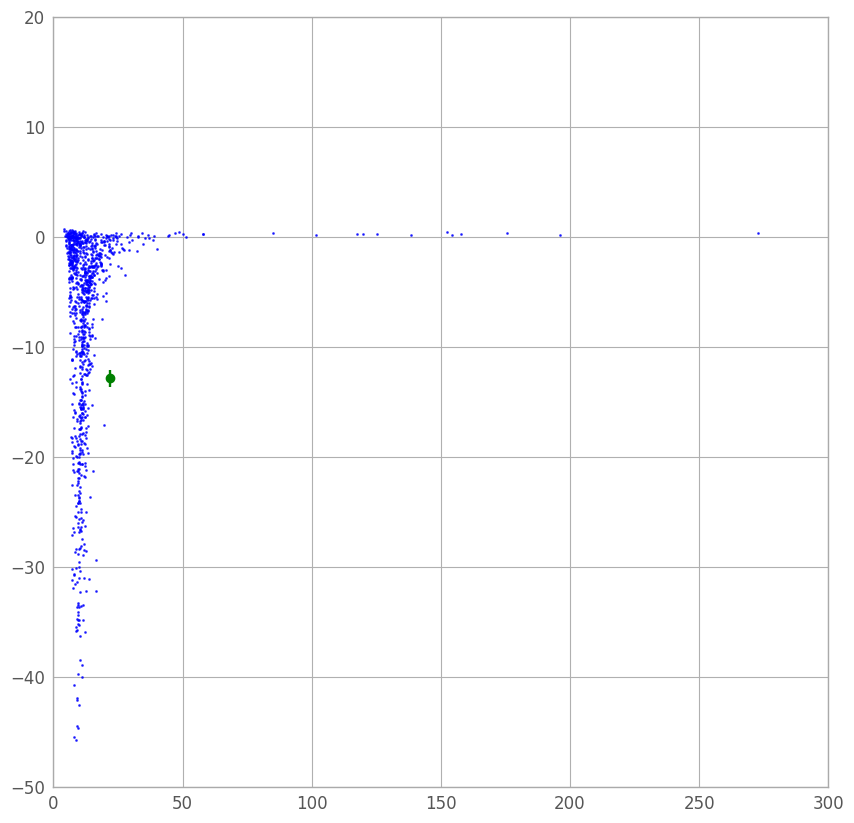

In [93]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

def binned_scatter_plot(x_list, y_list, n_bins, smooth=True, colors=None, labels=None):
    """
    Create binned scatter plots from multiple unbinned x and y data sets.
    
    Parameters:
    x_list (list of array-like): List of arrays of x data points.
    y_list (list of array-like): List of arrays of y data points.
    n_bins (int): Number of bins to use for binning the data.
    smooth (bool): Whether to plot a smooth line through the binned data points.
    colors (list of str): List of colors for the points and lines in the plot.
    labels (list of str): List of labels for each dataset in the plot legend.
    """
    if colors is None:
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    
    if labels is None:
        labels = [f'Dataset {i+1}' for i in range(len(x_list))]
    
    plt.figure(figsize=(10, 6))
    
    for i, (x, y) in enumerate(zip(x_list, y_list)):
        color = colors[i % len(colors)]
        label = labels[i]
        
        # Create a DataFrame from the x and y data
        data = pd.DataFrame({'x': x, 'y': y})
        
        # Bin the data
        data['bin'] = pd.cut(data['x'], bins=n_bins, labels=False)
        
        # Calculate mean and standard error for each bin
        binned_data = data.groupby('bin').agg({
            'x': 'mean',
            'y': ['mean', 'sem']
        }).reset_index()
        
        # Flatten the MultiIndex columns
        binned_data.columns = ['bin', 'x_mean', 'y_mean', 'y_sem']
        
        # Plot the binned scatter plot with error bars
        
        plt.figure(figsize=(10, 10))
        plt.scatter(R_nominal,1-(((sigma_V_phi**2+sigma_V_theta**2)/2)/sigma_V_r**2), color='blue', alpha=0.7,s=1, label='Data Points')
        plt.xlim(0,300) 
        plt.ylim(-50,20)
        
        plt.errorbar(binned_data['x_mean'], binned_data['y_mean'], yerr=binned_data['y_sem'], fmt='o', color=color, label=f'{label} - Binned Data with Error Bars')
        
        if smooth:
            # Sort the binned data to ensure the smooth line is plotted correctly
            binned_data = binned_data.sort_values(by='x_mean')
            
            
            
            # Plot smooth regression line
           # plt.plot(x_smooth, y_smooth, color=color, linestyle='-', linewidth=2, alpha=0.8, label=f'{label} - Smooth Regression Line')
     
binned_scatter_plot([R_nominal], [beeta], n_bins=1, smooth=True, colors=['g'])             

In [70]:
ra_array = np.array(results1['ra']) * u.degree
dec_array = np.array(results1['dec']) * u.degree
distance_array = (np.array(results1['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(results1['pmra']) * u.mas / u.yr
pm_dec_array = np.array(-results1['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(results1['radial_velocity']) * u.km / u.s

ra_error=np.array(results1['ra_error']) * u.degree
dec_error=np.array(results1['dec_error']) * u.degree
distance_error=distance_array*(np.array((results1['parallax_error']))/np.array(results1['parallax']) * u.kpc)
radial_velocity_error=np.array(results1['radial_velocity_error']) * u.km / u.s
pm_ra_error=np.array(results1['pmra_error']) * u.mas / u.yr
pm_dec_error=np.array(results1['pmdec_error']) * u.mas / u.yr


num_samples = 1000
for i in range(num_samples):
        # Generate random samples for each input parameter
    ra_sample = np.random.normal(ra_array,ra_error)
    dec_sample = np.random.normal(dec_array, dec_error)
    distance_sample = np.random.normal(distance_array, distance_error)
    pm_ra_cosdec_sample = np.random.normal(pm_ra_cosdec_array, pm_ra_error)
    pm_dec_sample = np.random.normal(pm_dec_array, pm_dec_error)
    radial_velocity_sample = np.random.normal(radial_velocity_array, radial_velocity_error)
    

distance_array,distance_error,distance_sample,np.array(results1['parallax']),np.array(results1['parallax_error'])





(<Quantity [125.71261786,   1.31524492,   0.94641727, ...,   7.55321935,
             23.3791057 ,   3.24753357] kpc>,
 <Quantity [8.66999562e+02, 6.27990521e-02, 2.57081452e-02, ...,
            8.67025277e-01, 1.29280311e+01, 1.29010475e-01] kpc2>,
 array([-153.19230067,    1.45700477,    0.9566895 , ...,    7.48053963,
          13.01083499,    3.05389152]),
 array([0.00795465, 0.76031467, 1.05661639, ..., 0.13239388, 0.04277324,
        0.30792599]),
 array([0.05486067, 0.03630278, 0.02870155, ..., 0.01519734, 0.02365248,
        0.01223257], dtype=float32))

In [71]:
ra_array = np.array(results1['ra']) * u.degree
dec_array = np.array(results1['dec']) * u.degree
distance_array = (np.array(results1['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(results1['pmra']) * u.mas / u.yr
pm_dec_array = np.array(-results1['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(results1['radial_velocity']) * u.km / u.s

ra_error=np.array(results1['ra_error']) * u.degree
dec_error=np.array(results1['dec_error']) * u.degree
distance_error=(np.array((distance_array*results1['parallax_error']))/np.array(results1['parallax']) * u.kpc)
radial_velocity_error=np.array(results1['radial_velocity_error']) * u.km / u.s
pm_ra_error=np.array(results1['pmra_error']) * u.mas / u.yr
pm_dec_error=np.array(results1['pmdec_error']) * u.mas / u.yr


num_samples = 1
for i in range(num_samples):

        # Generate random samples for each input parameter
        ra_sample = np.random.normal(ra_array,ra_error)* u.degree
        dec_sample = np.random.normal(dec_array, dec_error)* u.degree
        distance_sample = np.abs(np.random.normal(distance_array, distance_error))*u.kpc
        pm_ra_cosdec_sample = np.random.normal(pm_ra_cosdec_array, pm_ra_error)* u.mas / u.yr
        pm_dec_sample = np.random.normal(pm_dec_array, pm_dec_error)* u.mas / u.yr
        radial_velocity_sample = np.random.normal(radial_velocity_array, radial_velocity_error) * u.km / u.s
    



        radial_velocity_error=np.array(results1['radial_velocity_error']) * u.km / u.s
        pm_ra_error=np.array(results1['pmra_error']) * u.mas / u.yr
        pm_dec_error=np.array(results1['pmdec_error']) * u.mas / u.yr


# Function to transform coordinates
        def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
                 c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity, frame='icrs')
                 g = c.transform_to(Galactocentric())
                 return np.array([g.v_x.value, g.v_y.value, g.v_z.value])

# Arrays to store the results
        vx_nominal = []
        vy_nominal = []
        vz_nominal = []
        sigma_vx = []
        sigma_vy = []
        sigma_vz = []

# Loop through each set of inputs
        for i in range(len(ra_array)):

                ra = ra_sample[i]
                dec = dec_sample[i]
                distance = distance_sample[i]
                pm_ra_cosdec = pm_ra_cosdec_sample[i]
                pm_dec = pm_dec_sample[i]
                radial_velocity = radial_velocity_sample[i]

                sigma_pm_ra_cosdec = pm_ra_error[i]
                sigma_pm_dec = pm_dec_error[i]
                sigma_radial_velocity = radial_velocity_error[i]

    # Evaluate the function at the nominal values
                v_x_nom, v_y_nom, v_z_nom = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity)

    # Numerically compute the Jacobian matrix
                epsilon = 1e-5
                jacobian = np.zeros((3, 3))

    # Partial derivatives with respect to radial velocity
                v_eps = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity + epsilon * u.km / u.s)
                jacobian[:, 0] = (np.array(v_eps) - np.array([v_x_nom, v_y_nom, v_z_nom])) / epsilon

    # Partial derivatives with respect to proper motion in ra
                v_eps = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec + epsilon * u.mas / u.yr, pm_dec, radial_velocity)
                jacobian[:, 1] = (np.array(v_eps) - np.array([v_x_nom, v_y_nom, v_z_nom])) / epsilon

    # Partial derivatives with respect to proper motion in dec
                v_eps = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec + epsilon * u.mas / u.yr, radial_velocity)
                jacobian[:, 2] = (np.array(v_eps) - np.array([v_x_nom, v_y_nom, v_z_nom])) / epsilon

    # Construct the input covariance matrix
                cov_matrix_input = np.diag([sigma_radial_velocity.value**2, sigma_pm_ra_cosdec.value**2, sigma_pm_dec.value**2])

    # Transform the covariance matrix
                cov_matrix_output = jacobian @ cov_matrix_input @ jacobian.T

    # The propagated uncertainties are the square roots of the diagonal elements
                sigma_v_x, sigma_v_y, sigma_v_z = np.sqrt(np.diag(cov_matrix_output))

    # Store the results
                vx_nominal.append(v_x_nom)
                vy_nominal.append(v_y_nom)
                vz_nominal.append(v_z_nom)
                sigma_vx.append(sigma_v_x)
                sigma_vy.append(sigma_v_y)
                sigma_vz.append(sigma_v_z)

# Convert results to arrays for easier handling
        vx_nominal = np.array(vx_nominal)
        vy_nominal = np.array(vy_nominal)
        vz_nominal = np.array(vz_nominal)
        sigma_vx = np.array(sigma_vx)
        sigma_vy = np.array(sigma_vy)
        sigma_vz = np.array(sigma_vz)

        def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
                 c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity, frame='icrs')
                 g = c.transform_to(Galactocentric())
                 return np.array([g.v_x.value, g.v_y.value, g.v_z.value]),g


# Function to transform galactocentric velocities to cylindrical velocities
        def galactocentric_to_cylindrical(g, vx, vy, vz):
                X = g.x.value
                Y = g.y.value
                Z = g.z.value
                phi = np.arctan2(Y, X)
                theta = (np.pi/2) - np.arctan2(Z, np.sqrt(X**2 + Y**2))
                R = np.sqrt(X**2 + Y**2 + Z**2)

                V_phi = vx * np.sin(phi) - vy * np.cos(phi)
                V_r = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.sin(theta)) + vz * np.cos(theta)
                V_theta = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.cos(theta)) - vz * np.sin(theta)
    
                return np.array([V_phi, V_r, V_theta, R])

# Arrays to store the results
        V_phi_nominal1 = []
        V_r_nominal1 = []
        V_theta_nominal1 = []
        R_nominal1 = []
        sigma_V_phi1 = []
        sigma_V_r1 = []
        sigma_V_theta1 = []

        for i in range(len(ra_array)):
                ra = ra_sample[i]
                dec = dec_sample[i]
                distance = distance_sample[i]
                pm_ra_cosdec = pm_ra_cosdec_sample[i]
                pm_dec = pm_dec_sample[i]
                radial_velocity = radial_velocity_sample[i]

                sigma_pm_ra_cosdec =sigma_vx[i]
                sigma_pm_dec = sigma_vy[i]
                sigma_radial_velocity = sigma_vz[i]

    # Evaluate the function at the nominal values
                (v_x_nom, v_y_nom, v_z_nom), g = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity)
                V_nom = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom, v_z_nom)
                V_phi_nom, V_r_nom, V_theta_nom, R_nom = V_nom
    
    # Numerically compute the Jacobian matrix
                epsilon = 1e-5
                jacobian = np.zeros((4, 3))

    # Partial derivatives with respect to v_x
                V_eps = galactocentric_to_cylindrical(g, v_x_nom + epsilon, v_y_nom, v_z_nom)
                jacobian[:, 0] = (V_eps - V_nom) / epsilon

    # Partial derivatives with respect to v_y
                V_eps = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom + epsilon, v_z_nom)
                jacobian[:, 1] = (V_eps - V_nom) / epsilon

    # Partial derivatives with respect to v_z
                V_eps = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom, v_z_nom + epsilon)
                jacobian[:, 2] = (V_eps - V_nom) / epsilon

    # Construct the input covariance matrix
                cov_matrix_input = np.diag([sigma_radial_velocity**2, sigma_pm_ra_cosdec**2, sigma_pm_dec**2])

    # Transform the covariance matrix
                cov_matrix_output = jacobian @ cov_matrix_input @ jacobian.T

    # The propagated uncertainties are the square roots of the diagonal elements
                sigma_V_phi_i, sigma_V_r_i, sigma_V_theta_i, sigma_R_i = np.sqrt(np.diag(cov_matrix_output))

    # Store the results
                V_phi_nominal1.append(V_phi_nom)
                V_r_nominal1.append(V_r_nom)
                V_theta_nominal1.append(V_theta_nom)
                R_nominal1.append(R_nom)
                sigma_V_phi1.append(sigma_V_phi_i)
                sigma_V_r1.append(sigma_V_r_i)
                sigma_V_theta1.append(sigma_V_theta_i)

# Convert results to arrays for easier handling
        V_phi_nominal1 = np.array(V_phi_nominal1)
        V_r_nominal1 = np.array(V_r_nominal1)
        V_theta_nominal1 = np.array(V_theta_nominal1)
        R_nominal1 = np.array(R_nominal1)
        sigma_V_phi1 = np.array(sigma_V_phi1)
        sigma_V_r1 = np.array(sigma_V_r1)
        sigma_V_theta1 = np.array(sigma_V_theta1)





In [72]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric

def monte_carlo_error_propagation(num_samples, ra_array, dec_array, distance_array, 
                                  pm_ra_cosdec_array, pm_dec_array, radial_velocity_array,
                                  ra_error, dec_error, distance_error,
                                  pm_ra_error, pm_dec_error, radial_velocity_error):
    """
    Perform Monte Carlo error propagation for the given input arrays.

    Parameters:
    - num_samples: Number of Monte Carlo samples
    - ra_array, dec_array: Right Ascension and Declination arrays (astropy quantities)
    - distance_array: Distance array (astropy quantities)
    - pm_ra_cosdec_array, pm_dec_array: Proper motion arrays (astropy quantities)
    - radial_velocity_array: Radial velocity array (astropy quantities)
    - ra_error, dec_error: Errors in Right Ascension and Declination (astropy quantities)
    - distance_error: Errors in distance (astropy quantities)
    - pm_ra_error, pm_dec_error: Errors in proper motion (astropy quantities)
    - radial_velocity_error: Errors in radial velocity (astropy quantities)

    Returns:
    - A dictionary containing nominal values and propagated uncertainties
    """
    
    def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
        c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                     pm_dec=pm_dec, radial_velocity=radial_velocity, frame='icrs')
        g = c.transform_to(Galactocentric())
        return np.array([g.v_x.value, g.v_y.value, g.v_z.value]), g

    def galactocentric_to_cylindrical(g, vx, vy, vz):
        X = g.x.value
        Y = g.y.value
        Z = g.z.value
        phi = np.arctan2(Y, X)
        theta = (np.pi / 2) - np.arctan2(Z, np.sqrt(X**2 + Y**2))
        R = np.sqrt(X**2 + Y**2 + Z**2)

        V_phi = vx * np.sin(phi) - vy * np.cos(phi)
        V_r = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.sin(theta)) + vz * np.cos(theta)
        V_theta = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.cos(theta)) - vz * np.sin(theta)
        
        return np.array([V_phi, V_r, V_theta, R])
    
    # Arrays to store the results
    sigma_V_r_samples = []
    
    # Loop through each sample
    for sample in range(num_samples):
        # Generate random samples for each input parameter
        ra_sample = np.random.normal(ra_array, ra_error) * u.degree
        dec_sample = np.random.normal(dec_array, dec_error) * u.degree
        distance_sample = (np.random.normal(distance_array, distance_error)) * u.kpc
        pm_ra_cosdec_sample = np.random.normal(pm_ra_cosdec_array, pm_ra_error) * u.mas / u.yr
        pm_dec_sample = np.random.normal(pm_dec_array, pm_dec_error) * u.mas / u.yr
        radial_velocity_sample = np.random.normal(radial_velocity_array, radial_velocity_error) * u.km / u.s
        
        # Arrays to store the results for this sample
        V_phi_nominal = []
        V_r_nominal = []
        V_theta_nominal = []
        R_nominal = []
        sigma_V_phi = []
        sigma_V_r = []
        sigma_V_theta = []
        
        # Loop through each set of inputs
        for i in range(len(ra_array)):
            ra = ra_sample[i]
            dec = dec_sample[i]
            distance = distance_sample[i]
            pm_ra_cosdec = pm_ra_cosdec_sample[i]
            pm_dec = pm_dec_sample[i]
            radial_velocity = radial_velocity_sample[i]

            sigma_pm_ra_cosdec = pm_ra_error[i]
            sigma_pm_dec = pm_dec_error[i]
            sigma_radial_velocity = radial_velocity_error[i]

            # Evaluate the function at the nominal values
            (v_x_nom, v_y_nom, v_z_nom), g = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity)
            V_nom = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom, v_z_nom)
            V_phi_nom, V_r_nom, V_theta_nom, R_nom = V_nom

            # Numerically compute the Jacobian matrix
            epsilon = 1e-5
            jacobian = np.zeros((4, 3))

            # Partial derivatives with respect to v_x
            V_eps = galactocentric_to_cylindrical(g, v_x_nom + epsilon, v_y_nom, v_z_nom)
            jacobian[:, 0] = (V_eps - V_nom) / epsilon

            # Partial derivatives with respect to v_y
            V_eps = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom + epsilon, v_z_nom)
            jacobian[:, 1] = (V_eps - V_nom) / epsilon

            # Partial derivatives with respect to v_z
            V_eps = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom, v_z_nom + epsilon)
            jacobian[:, 2] = (V_eps - V_nom) / epsilon

            # Construct the input covariance matrix
            cov_matrix_input = np.diag([sigma_radial_velocity.value**2, sigma_pm_ra_cosdec.value**2, sigma_pm_dec.value**2])

            # Transform the covariance matrix
            cov_matrix_output = jacobian @ cov_matrix_input @ jacobian.T

            # The propagated uncertainties are the square roots of the diagonal elements
            sigma_V_phi_i, sigma_V_r_i, sigma_V_theta_i, _ = np.sqrt(np.diag(cov_matrix_output))

            # Store sigma_V_r for this iteration
            sigma_V_r.append(sigma_V_r_i)
        
        # Store sigma_V_r for this sample iteration
        sigma_V_r_samples.append(sigma_V_r)

    # Convert sigma_V_r_samples to numpy array
    sigma_V_r_samples = np.array(sigma_V_r_samples)
    
    return sigma_V_r_samples

# Example usage:
num_samples = 1

sigma_V_r_samples = monte_carlo_error_propagation(
    num_samples=num_samples, 
    ra_array=ra_array, dec_array=dec_array, distance_array=distance_array,
    pm_ra_cosdec_array=pm_ra_cosdec_array, pm_dec_array=pm_dec_array, 
    radial_velocity_array=radial_velocity_array,
    ra_error=ra_error, dec_error=dec_error, distance_error=distance_error,
    pm_ra_error=pm_ra_error, pm_dec_error=pm_dec_error, 
    radial_velocity_error=radial_velocity_error
)

# Print the sigma_V_r_samples
for sample_idx, sigma_V_r_sample in enumerate(sigma_V_r_samples):
    print(f"Sample {sample_idx + 1} - sigma_V_r: {sigma_V_r_sample}")




ValueError: Distance must be >= 0. To allow negative distance values, you must explicitly pass in a `Distance` object with the argument 'allow_negative=True'.

In [ ]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric

def monte_carlo_error_propagation(num_samples, ra_array, dec_array, distance_array, 
                                  pm_ra_cosdec_array, pm_dec_array, radial_velocity_array,
                                  ra_error, dec_error, distance_error,
                                  pm_ra_error, pm_dec_error, radial_velocity_error):
    """
    Perform Monte Carlo error propagation for the given input arrays.

    Parameters:
    - num_samples: Number of Monte Carlo samples
    - ra_array, dec_array: Right Ascension and Declination arrays (astropy quantities)
    - distance_array: Distance array (astropy quantities)
    - pm_ra_cosdec_array, pm_dec_array: Proper motion arrays (astropy quantities)
    - radial_velocity_array: Radial velocity array (astropy quantities)
    - ra_error, dec_error: Errors in Right Ascension and Declination (astropy quantities)
    - distance_error: Errors in distance (astropy quantities)
    - pm_ra_error, pm_dec_error: Errors in proper motion (astropy quantities)
    - radial_velocity_error: Errors in radial velocity (astropy quantities)

    Returns:
    - A dictionary containing nominal values and propagated uncertainties
    """
    
    def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
        c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                     pm_dec=pm_dec, radial_velocity=radial_velocity, frame='icrs')
        g = c.transform_to(Galactocentric())
        return np.array([g.v_x.value, g.v_y.value, g.v_z.value]), g

    def galactocentric_to_cylindrical(g, vx, vy, vz):
        X = g.x.value
        Y = g.y.value
        Z = g.z.value
        phi = np.arctan2(Y, X)
        theta = (np.pi / 2) - np.arctan2(Z, np.sqrt(X**2 + Y**2))
        R = np.sqrt(X**2 + Y**2 + Z**2)

        V_phi = vx * np.sin(phi) - vy * np.cos(phi)
        V_r = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.sin(theta)) + vz * np.cos(theta)
        V_theta = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.cos(theta)) - vz * np.sin(theta)
        
        return np.array([V_phi, V_r, V_theta, R])
    
    # Arrays to store the results
    sigma_V_r_samples = []
    
    # Loop through each sample
    for sample in range(num_samples):
        # Generate random samples for each input parameter
        ra_sample = np.random.normal(ra_array, ra_error) * u.degree
        dec_sample = np.random.normal(dec_array, dec_error) * u.degree
        distance_sample = np.abs(np.random.normal(distance_array, distance_error)) * u.kpc
        pm_ra_cosdec_sample = np.random.normal(pm_ra_cosdec_array, pm_ra_error) * u.mas / u.yr
        pm_dec_sample = np.random.normal(pm_dec_array, pm_dec_error) * u.mas / u.yr
        radial_velocity_sample = np.random.normal(radial_velocity_array, radial_velocity_error) * u.km / u.s
        
        # Arrays to store the results for this sample
        V_phi_nominal = []
        V_r_nominal = []
        V_theta_nominal = []
        R_nominal = []
        sigma_V_phi = []
        sigma_V_r = []
        sigma_V_theta = []
        
        # Loop through each set of inputs
        for i in range(len(ra_array)):
            ra = ra_sample[i]
            dec = dec_sample[i]
            distance = distance_sample[i]
            pm_ra_cosdec = pm_ra_cosdec_sample[i]
            pm_dec = pm_dec_sample[i]
            radial_velocity = radial_velocity_sample[i]

            sigma_pm_ra_cosdec = pm_ra_error[i]
            sigma_pm_dec = pm_dec_error[i]
            sigma_radial_velocity = radial_velocity_error[i]

            # Evaluate the function at the nominal values
            (v_x_nom, v_y_nom, v_z_nom), g = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity)
            V_nom = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom, v_z_nom)
            V_phi_nom, V_r_nom, V_theta_nom, R_nom = V_nom

            # Numerically compute the Jacobian matrix
            epsilon = 1e-5
            jacobian = np.zeros((4, 3))

            # Partial derivatives with respect to v_x
            V_eps = galactocentric_to_cylindrical(g, v_x_nom + epsilon, v_y_nom, v_z_nom)
            jacobian[:, 0] = (V_eps - V_nom) / epsilon

            # Partial derivatives with respect to v_y
            V_eps = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom + epsilon, v_z_nom)
            jacobian[:, 1] = (V_eps - V_nom) / epsilon

            # Partial derivatives with respect to v_z
            V_eps = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom, v_z_nom + epsilon)
            jacobian[:, 2] = (V_eps - V_nom) / epsilon

            # Construct the input covariance matrix
            cov_matrix_input = np.diag([sigma_radial_velocity.value**2, sigma_pm_ra_cosdec.value**2, sigma_pm_dec.value**2])

            # Transform the covariance matrix
            cov_matrix_output = jacobian @ cov_matrix_input @ jacobian.T

            # The propagated uncertainties are the square roots of the diagonal elements
            sigma_V_phi_i, sigma_V_r_i, sigma_V_theta_i, _ = np.sqrt(np.diag(cov_matrix_output))

            # Store sigma_V_r for this iteration
            sigma_V_r.append(sigma_V_r_i)
        
        # Store sigma_V_r for this sample iteration
        sigma_V_r_samples.append(sigma_V_r)

    # Convert sigma_V_r_samples to numpy array
    sigma_V_r_samples = np.array(sigma_V_r_samples)
    
    return sigma_V_r_samples

# Example usage:
num_samples = 2

sigma_V_r_samples = monte_carlo_error_propagation(
    num_samples=num_samples, 
    ra_array=ra_array, dec_array=dec_array, distance_array=distance_array,
    pm_ra_cosdec_array=pm_ra_cosdec_array, pm_dec_array=pm_dec_array, 
    radial_velocity_array=radial_velocity_array,
    ra_error=ra_error, dec_error=dec_error, distance_error=distance_error,
    pm_ra_error=pm_ra_error, pm_dec_error=pm_dec_error, 
    radial_velocity_error=radial_velocity_error
)

# Print the sigma_V_r_samples
for sample_idx, sigma_V_r_sample in enumerate(sigma_V_r_samples):
    print(f"Sample {sample_idx + 1} - sigma_V_r: {sigma_V_r_sample}")




Sample 1 - sigma_V_r: [       nan        nan 2.45809634 ... 1.5044589         nan 1.82892574]
Sample 2 - sigma_V_r: [       nan        nan 2.45803644 ... 1.24103955        nan 1.87647129]


In [ ]:
sigma_V_r_samples = np.array(sigma_V_r_samples)

# Calculate the mean for each index across all samples
sigma_V_r_mean = np.mean(sigma_V_r_samples, axis=0)
sigma_V_r_samples

array([[       nan,        nan, 2.45809634, ..., 1.5044589 ,        nan,
        1.82892574],
       [       nan,        nan, 2.45803644, ..., 1.24103955,        nan,
        1.87647129]])

In [73]:
# Plotting histograms for each sample
plt.figure(figsize=(12, 8))


   
plt.hist(sigma_V_r_mean, bins=100, alpha=0.5 )
plt.xlabel(r'$\sigma_{V_r}$ (km/s)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of $\sigma_{V_r}$ for Each Sample', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'sigma_V_r_mean' is not defined

<Figure size 1200x800 with 0 Axes>

KeyboardInterrupt: 

In [ ]:
!pip install joblib


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
from joblib import Parallel, delayed

def monte_carlo_error_propagation(num_samples, ra_array, dec_array, distance_array, 
                                  pm_ra_cosdec_array, pm_dec_array, radial_velocity_array,
                                  ra_error, dec_error, distance_error,
                                  pm_ra_error, pm_dec_error, radial_velocity_error):
    """
    Perform Monte Carlo error propagation for the given input arrays using parallel processing.

    Parameters:
    - num_samples: Number of Monte Carlo samples
    - ra_array, dec_array: Right Ascension and Declination arrays (astropy quantities)
    - distance_array: Distance array (astropy quantities)
    - pm_ra_cosdec_array, pm_dec_array: Proper motion arrays (astropy quantities)
    - radial_velocity_array: Radial velocity array (astropy quantities)
    - ra_error, dec_error: Errors in Right Ascension and Declination (astropy quantities)
    - distance_error: Errors in distance (astropy quantities)
    - pm_ra_error, pm_dec_error: Errors in proper motion (astropy quantities)
    - radial_velocity_error: Errors in radial velocity (astropy quantities)

    Returns:
    - A numpy array containing propagated uncertainties for each sample
    """
    
    def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
        c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                     pm_dec=pm_dec, radial_velocity=radial_velocity, frame='icrs')
        g = c.transform_to(Galactocentric())
        return np.array([g.v_x.value, g.v_y.value, g.v_z.value]), g

    def galactocentric_to_cylindrical(g, vx, vy, vz):

        X = g.x.value
        Y = g.y.value
        Z = g.z.value
        phi = np.arctan2(Y, X)
        theta = (np.pi / 2) - np.arctan2(Z, np.sqrt(X**2 + Y**2))
        R = np.sqrt(X**2 + Y**2 + Z**2)

        if R > 0 * u.kpc:

            V_phi = vx * np.sin(phi) - vy * np.cos(phi)
            V_r = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.sin(theta)) + vz * np.cos(theta)
            V_theta = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.cos(theta)) - vz * np.sin(theta)
        
            return np.array([V_phi, V_r, V_theta])
        else:
            return np.array([np.nan, np.nan, np.nan])  # Return NaNs if R <= 20 kpc

    
    # Generate random samples for each input parameter
    ra_samples = np.random.normal(ra_array, ra_error, (num_samples, len(ra_array))) * u.degree
    dec_samples = np.random.normal(dec_array, dec_error, (num_samples, len(dec_array))) * u.degree
    distance_samples = np.abs(np.random.normal(distance_array, distance_error, (num_samples, len(distance_array)))) * u.kpc
    pm_ra_cosdec_samples = np.random.normal(pm_ra_cosdec_array, pm_ra_error, (num_samples, len(pm_ra_cosdec_array))) * u.mas / u.yr
    pm_dec_samples = np.random.normal(pm_dec_array, pm_dec_error, (num_samples, len(pm_dec_array))) * u.mas / u.yr
    radial_velocity_samples = np.random.normal(radial_velocity_array, radial_velocity_error, (num_samples, len(radial_velocity_array))) * u.km / u.s
    
    # Define a function to process each sample in parallel
    def process_sample(sample_idx):
        sigma_V_r = np.zeros(len(ra_array))
        
        ra_sample = ra_samples[sample_idx]
        dec_sample = dec_samples[sample_idx]
        distance_sample = distance_samples[sample_idx]
        pm_ra_cosdec_sample = pm_ra_cosdec_samples[sample_idx]
        pm_dec_sample = pm_dec_samples[sample_idx]
        radial_velocity_sample = radial_velocity_samples[sample_idx]
        
        for i in range(len(ra_array)):
            ra = ra_sample[i]
            dec = dec_sample[i]
            distance = distance_sample[i]
            pm_ra_cosdec = pm_ra_cosdec_sample[i]
            pm_dec = pm_dec_sample[i]
            radial_velocity = radial_velocity_sample[i]

            sigma_pm_ra_cosdec = pm_ra_error[i]
            sigma_pm_dec = pm_dec_error[i]
            sigma_radial_velocity = radial_velocity_error[i]

            # Evaluate the function at the nominal values
            (v_x_nom, v_y_nom, v_z_nom), g = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity)
            V_nom = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom, v_z_nom)
            V_phi_nom, V_r_nom, V_theta_nom, R_nom = V_nom

            # Numerically compute the Jacobian matrix
            epsilon = 1e-5
            jacobian = np.zeros((4, 3))

            # Partial derivatives with respect to v_x
            V_eps = galactocentric_to_cylindrical(g, v_x_nom + epsilon, v_y_nom, v_z_nom)
            jacobian[:, 0] = (V_eps - V_nom) / epsilon

            # Partial derivatives with respect to v_y
            V_eps = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom + epsilon, v_z_nom)
            jacobian[:, 1] = (V_eps - V_nom) / epsilon

            # Partial derivatives with respect to v_z
            V_eps = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom, v_z_nom + epsilon)
            jacobian[:, 2] = (V_eps - V_nom) / epsilon

            # Construct the input covariance matrix
            cov_matrix_input = np.diag([sigma_radial_velocity.value**2, sigma_pm_ra_cosdec.value**2, sigma_pm_dec.value**2])

            # Transform the covariance matrix
            cov_matrix_output = jacobian @ cov_matrix_input @ jacobian.T

            # The propagated uncertainties are the square roots of the diagonal elements
            sigma_V_phi_i, sigma_V_r_i, sigma_V_theta_i, _ = np.sqrt(np.diag(cov_matrix_output))

            # Store sigma_V_r for this iteration
            sigma_V_r[i] = sigma_V_r_i

        return sigma_V_r
    
    # Use parallel processing to evaluate samples
    sigma_V_r_samples = Parallel(n_jobs=-1, verbose=10)(delayed(process_sample)(sample_idx) for sample_idx in range(num_samples))
    
    return np.array(sigma_V_r_samples)

# Example usage:
num_samples = 5

sigma_V_r_samples = monte_carlo_error_propagation(
    num_samples=num_samples, 
    ra_array=ra_array, dec_array=dec_array, distance_array=distance_array,
    pm_ra_cosdec_array=pm_ra_cosdec_array, pm_dec_array=pm_dec_array, 
    radial_velocity_array=radial_velocity_array,
    ra_error=ra_error, dec_error=dec_error, distance_error=distance_error,
    pm_ra_error=pm_ra_error, pm_dec_error=pm_dec_error, 
    radial_velocity_error=radial_velocity_error
)

# Print the sigma_V_r_samples
for sample_idx, sigma_V_r_sample in enumerate(sigma_V_r_samples):
    print(f"Sample {sample_idx + 1} - sigma_V_r: {sigma_V_r_sample}")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


UnitConversionError: Can only apply 'less' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan).

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Sample 1 - sigma_V_r: []


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.9s


C:\Users\sutir\AppData\Local\Temp\ipykernel_40892\2770865916.py:5: RuntimeWarning: Mean of empty slice
  sigma_V_r_mean = np.nanmean(sigma_V_r_samples, axis=1)
c:\Python311\Lib\site-packages\matplotlib\axes\_axes.py:6834: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\Python311\Lib\site-packages\matplotlib\axes\_axes.py:6835: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

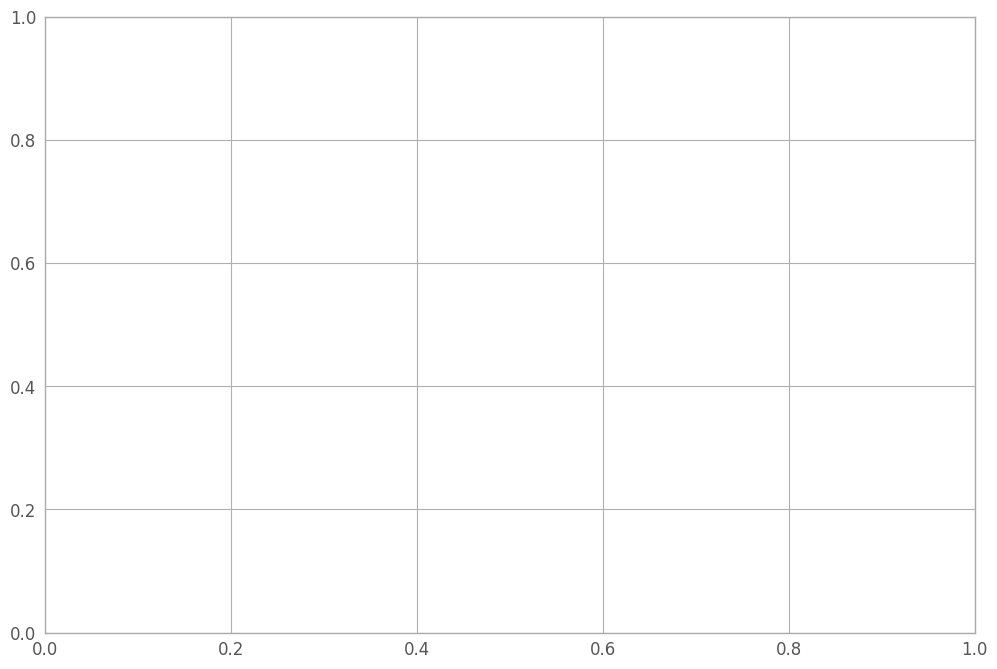

In [ ]:
# Plotting histograms for each sample
sigma_V_r_samples = np.array(sigma_V_r_samples)

# Calculate the mean for each index across all samples
sigma_V_r_mean = np.nanmean(sigma_V_r_samples, axis=1)
sigma_V_r_samples
plt.figure(figsize=(12, 8))


   
plt.hist(sigma_V_r_mean, bins=200, alpha=0.5  )
plt.xlabel(r'$\sigma_{V_r}$ (km/s)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of $\sigma_{V_r}$ for Each Sample', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
sigma_V_r_mean

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


UnitConversionError: Can only apply 'less' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan).

In [ ]:
from astropy import coordinates as coord
import numpy as np

# Example values (replace with your actual data)
ra_array_error = 180.0  # Example RA with error
dec_array_error = 30.0  # Example Dec with error
distance_array_error = 10.0  # Example distance with error
pm_ra_cosdec_array_error = 1.0  # Example proper motion RA with error
pm_dec_array_error = 1.0  # Example proper motion Dec with error
radial_velocity_array_error = 100.0  # Example radial velocity with error

# Example uncertainties (replace with your actual uncertainties)
ra_error = 0.1  # Example RA uncertainty
dec_error = 0.1  # Example Dec uncertainty
distance_error = 1.0  # Example distance uncertainty
pm_ra_cosdec_error = 0.05  # Example proper motion RA uncertainty
pm_dec_error = 0.05  # Example proper motion Dec uncertainty
radial_velocity_error = 10.0  # Example radial velocity uncertainty

# Create SkyCoord object with errors
c_icrs = coord.SkyCoord(
    ra=ra_array_error * u.deg,
    dec=dec_array_error * u.deg,
    distance=distance_array_error * u.kpc,
    pm_ra_cosdec=pm_ra_cosdec_array_error * u.mas / u.yr,
    pm_dec=pm_dec_array_error * u.mas / u.yr,
    radial_velocity=radial_velocity_array_error * u.km / u.s,
    frame="icrs",
    obstime="J2000",  # Specify the epoch if known
    ra_error=ra_error * u.deg,
    dec_error=dec_error * u.deg,
    distance_error=distance_error * u.kpc,
    pm_ra_cosdec_error=pm_ra_cosdec_error * u.mas / u.yr,
    pm_dec_error=pm_dec_error * u.mas / u.yr,
    radial_velocity_error=radial_velocity_error * u.km / u.s
)

# Transform to Galactocentric frame
gc_icrs = c_icrs.transform_to(coord.Galactocentric)

# Propagate errors using covariance matrix (example)
# This is a simplified example, actual covariance matrix calculations may vary
cov_matrix = np.diag([
    ra_error ** 2,
    dec_error ** 2,
    distance_error ** 2,
    pm_ra_cosdec_error ** 2,
    pm_dec_error ** 2,
    radial_velocity_error ** 2
])

# Error propagation (covariance matrix multiplication)
cov_matrix_galactocentric = np.dot(gc_icrs.cartesian_covariance_matrix, cov_matrix)


ValueError: Unrecognized keyword argument(s) 'ra_error', 'dec_error', 'distance_error', 'pm_ra_cosdec_error', 'pm_dec_error', 'radial_velocity_error'

In [ ]:
X=gc3.x
#X=Rsun-(r*np.mean(np.cos(results['l'])))
Y=gc3.y
Z=gc3.z
#Y=(r*np.mean(np.sin(results['l'])))
phi=np.arctan2(Y,X)
theta=(np.pi/2*u.rad)-np.arctan2(Z,np.sqrt(X*X+Y*Y))
R=np.sqrt(X*X+Y*Y+Z*Z)
#print(R)
S_phi=gc3.v_x*np.sin(phi)-gc3.v_y*np.cos(phi)
S_r=((gc3.v_x*np.cos(phi)+gc3.v_y*np.sin(phi))*np.sin(theta))+gc3.v_z*np.cos(theta)
S_theta=((gc3.v_x*np.cos(phi)+gc3.v_y*np.sin(phi))*np.cos(theta))-gc3.v_z*np.sin(theta)
beta=1-(((S_theta*S_theta)+(S_phi*S_phi))/(2*(S_r*S_r)))

import numpy as np
import matplotlib.pyplot as plt

# Generate unbinned scatter plot data

def binned_scatter_plot(x_list, y_list, n_bins, smooth=True, colors=None, labels=None):
    """
    Create binned scatter plots from multiple unbinned x and y data sets.
    
    Parameters:
    x_list (list of array-like): List of arrays of x data points.
    y_list (list of array-like): List of arrays of y data points.
    n_bins (int): Number of bins to use for binning the data.
    smooth (bool): Whether to plot a smooth line through the binned data points.
    colors (list of str): List of colors for the points and lines in the plot.
    labels (list of str): List of labels for each dataset in the plot legend.
    """
    if colors is None:
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    
    if labels is None:
        labels = [f'Dataset {i+1}' for i in range(len(x_list))]
    
    plt.figure(figsize=(10, 6))
    
    for i, (x, y) in enumerate(zip(x_list, y_list)):
        color = colors[i % len(colors)]
        label = labels[i]
        
        # Create a DataFrame from the x and y data
        data = pd.DataFrame({'x': x, 'y': y})
        
        # Bin the data
        data['bin'] = pd.cut(data['x'], bins=n_bins, labels=False)
        
        # Calculate mean and standard error for each bin
        binned_data = data.groupby('bin').agg({
            'x': 'mean',
            'y': ['mean', 'sem']
        }).reset_index()
        
        # Flatten the MultiIndex columns
        binned_data.columns = ['bin', 'x_mean', 'y_mean', 'y_sem']
        plt.scatter(R,beta, s=3, color='b', alpha=0.2,label='beta')
        plt.xlim(0,60)
        plt.ylim(-900,100)
        # Plot the binned scatter plot with error bars
        plt.errorbar(binned_data['x_mean'], binned_data['y_mean'], yerr=binned_data['y_sem'], fmt='o', color=color, label=f'{label} - Binned Data with Error Bars')
        
        if smooth:
            # Sort the binned data to ensure the smooth line is plotted correctly
            binned_data = binned_data.sort_values(by='x_mean')
            
            # Fit a smooth regression line (spline interpolation)
            spline = UnivariateSpline(binned_data['x_mean'], binned_data['y_mean'], w=1/binned_data['y_sem'], s=0)
            x_smooth = np.linspace(binned_data['x_mean'].min(), binned_data['x_mean'].max(), 500)
            y_smooth = spline(x_smooth)
            
            # Plot smooth regression line
           # plt.plot(x_smooth, y_smooth, color=color, linestyle='-', linewidth=2, alpha=0.8, label=f'{label} - Smooth Regression Line')


binned_scatter_plot([R], [beta], n_bins=3000, smooth=True, colors=['b'])           

NameError: name 'gc3' is not defined

In [ ]:
v_sun = [11.1, 244, 7.25] * (u.km / u.s)  # [vx, vy, vz]
gc_frame = coord.Galactocentric(
    galcen_distance=8 * u.kpc, galcen_v_sun=v_sun, z_sun=0 * u.pc
)
gc2 = c1.transform_to(gc_frame)
#print(gc2.v_x, gc2.v_y, gc2.v_z,gc2.x)
#print(gc2.v_x)

In [ ]:
Rsun = 8

X=gc2.x
#X=Rsun-(r*np.mean(np.cos(results['l'])))
Y=gc2.y
Z=gc2.z
#Y=(r*np.mean(np.sin(results['l'])))
phi=np.arctan2(Y,X)
theta=(np.pi/2*u.rad)-np.arctan2(Z,np.sqrt(X*X+Y*Y))
R=np.sqrt(X*X+Y*Y+Z*Z)
#print(R)
V_phi=gc2.v_x*np.sin(phi)-gc2.v_y*np.cos(phi)
V_r=((gc2.v_x*np.cos(phi)+gc2.v_y*np.sin(phi))*np.sin(theta))+gc2.v_z*np.cos(theta)
V_theta=((gc2.v_x*np.cos(phi)+gc2.v_y*np.sin(phi))*np.cos(theta))-gc2.v_z*np.sin(theta)
print(V_phi)
R


[         nan          nan 250.64213124 ...  41.28937953          nan
 112.26389609] km / s


<Quantity [132.50570177,   9.28513724,   8.91976312, ...,   7.97973594,
            19.99987658,   7.16136465] kpc>

(0.0, 60.0)

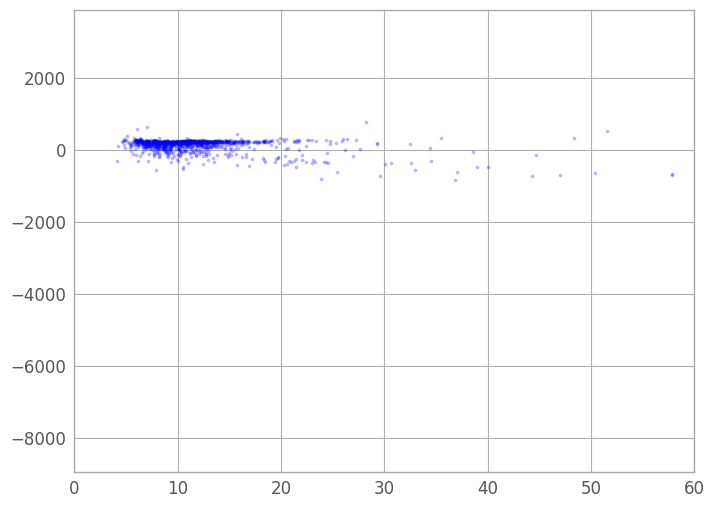

In [ ]:
plt.scatter(R,V_phi, s=3,color='b', alpha=0.2,label='V_phi')
plt.xlim(0,60)

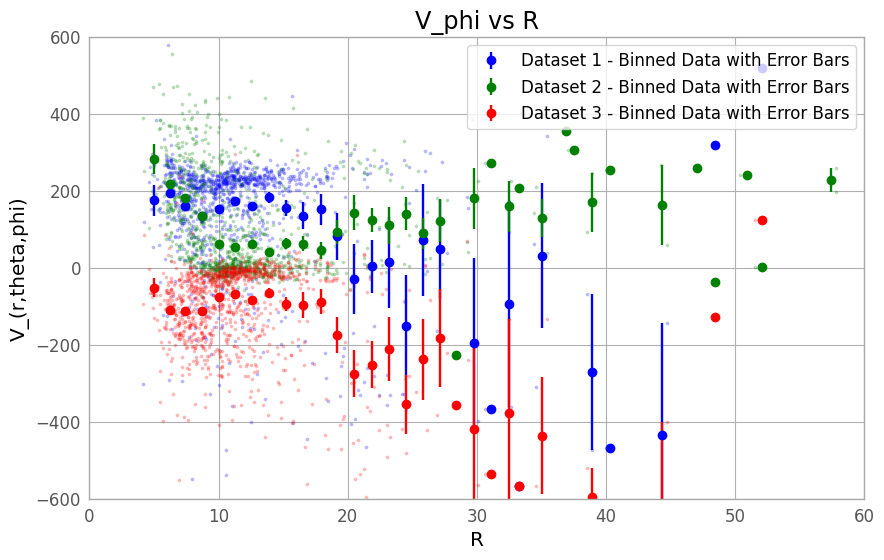

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

def binned_scatter_plot(x_list, y_list, n_bins, smooth=True, colors=None, labels=None):
    """
    Create binned scatter plots from multiple unbinned x and y data sets.
    
    Parameters:
    x_list (list of array-like): List of arrays of x data points.
    y_list (list of array-like): List of arrays of y data points.
    n_bins (int): Number of bins to use for binning the data.
    smooth (bool): Whether to plot a smooth line through the binned data points.
    colors (list of str): List of colors for the points and lines in the plot.
    labels (list of str): List of labels for each dataset in the plot legend.
    """
    if colors is None:
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    
    if labels is None:
        labels = [f'Dataset {i+1}' for i in range(len(x_list))]
    
    plt.figure(figsize=(10, 6))
    
    for i, (x, y) in enumerate(zip(x_list, y_list)):
        color = colors[i % len(colors)]
        label = labels[i]
        
        # Create a DataFrame from the x and y data
        data = pd.DataFrame({'x': x, 'y': y})
        
        # Bin the data
        data['bin'] = pd.cut(data['x'], bins=n_bins, labels=False)
        
        # Calculate mean and standard error for each bin
        binned_data = data.groupby('bin').agg({
            'x': 'mean',
            'y': ['mean', 'sem']
        }).reset_index()
        
        # Flatten the MultiIndex columns
        binned_data.columns = ['bin', 'x_mean', 'y_mean', 'y_sem']
        
        # Plot the binned scatter plot with error bars
        plt.errorbar(binned_data['x_mean'], binned_data['y_mean'], yerr=binned_data['y_sem'], fmt='o', color=color, label=f'{label} - Binned Data with Error Bars')
        
        if smooth:
            # Sort the binned data to ensure the smooth line is plotted correctly
            binned_data = binned_data.sort_values(by='x_mean')
            
            # Fit a smooth regression line (spline interpolation)
            spline = UnivariateSpline(binned_data['x_mean'], binned_data['y_mean'], w=1/binned_data['y_sem'], s=0)
            x_smooth = np.linspace(binned_data['x_mean'].min(), binned_data['x_mean'].max(), 500)
            y_smooth = spline(x_smooth)
            
            # Plot smooth regression line
           # plt.plot(x_smooth, y_smooth, color=color, linestyle='-', linewidth=2, alpha=0.8, label=f'{label} - Smooth Regression Line')
    
    plt.xlabel('X')
    plt.xlim(0,60)
    plt.ylabel('Y')
    plt.ylim(-600,600)
    plt.title('Binned Scatter Plot of V_phi vs R with Error Bars')
    plt.legend()
    plt.grid(True)
    plt.scatter(R,V_phi, s=3,color='b', alpha=0.2,label='V_phi')
    plt.scatter(R,V_r, s=3,color='g', alpha=0.2,label='V_r')
    plt.scatter(R,V_theta, s=3,color='r', alpha=0.2,label='V_theta')
    plt.title('V_phi vs R')
    plt.ylabel('V_(r,theta,phi)')
    plt.xlabel('R')
    
    plt.show()



binned_scatter_plot([R,R,R], [V_phi, V_r, V_theta], n_bins=3000, smooth=True, colors=['b', 'g','r'])


In [ ]:

# Define values to sample from
mean_m_1 = 40.e4
sigma_m_1 = 0.05e4
mean_m_2 = 30.e4
sigma_m_2 = 0.1e4
mean_r = 3.2
sigma_r = 0.01

{'star_O': 0, 'star_OB': 1, 'star_B': 2, 'star_A': [3, 4], 'star_FA': 5, 'star_F': [6, 7], 'star_G': [8, 9], 'star_K': 10, 'star_M1': 11, 'star_M3': 12, 'star_M5': 13, 'star_M8': 14, 'star_L1': 15, 'star_wd': [16, 20, 21], 'star_carbon': [17, 18, 19], 'star_Ksubdwarf': 22, 'galaxy_early': 23, 'galaxy': [24, 25, 26], 'galaxy_late': 27, 'galaxy_lrg': 28, 'qso': 29, 'qso_bal': [30, 31], 'qso_bright': 32}


objid,ra,dec,type,run,rerun,camcol,field,u,g,r,i,z,pmra,pmdec,pmraerr,pmdecerr,pml,pmb
uint64,float64,float64,int32,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1237670594404483109,132.866249978748,11.5825682685822,6,5849,301,1,109,16.77775,15.26794,14.7314,14.57734,14.51159,-11.19723,-3.383511,2.340106,2.340106,-1.640337,-11.58168
1237670594404483111,132.84944041609,11.6477987512467,6,5849,301,1,109,16.16777,14.7987,14.33837,14.20152,14.15976,-12.58452,-2.325743,2.340106,2.340106,-3.175369,-12.39743
1237670594404483148,132.883978542963,11.6034673875618,6,5849,301,1,109,15.00359,14.00283,14.22903,14.65687,13.2955,-10.52097,-2.219146,2.340106,2.340106,-2.410249,-10.47884
1237670594404483189,132.904218529444,11.6143350103854,6,5849,301,1,109,16.97619,15.20086,14.55001,14.34092,14.24909,-13.09212,-2.199976,2.340106,2.340106,-3.507598,-12.80392
1237670594404483219,132.941974680162,11.6049713827516,6,5849,301,1,109,14.37304,11.81012,11.04985,10.86096,11.19823,0.0,0.0,0.0,0.0,0.0,0.0
1237670594404483233,132.922242349141,11.6355656176688,6,5849,301,1,109,18.6883,16.91371,16.2146,15.94945,15.77868,-0.05123642,-2.934654,2.374998,2.374998,2.641453,-1.279668
1237670594404483280,132.940788244695,11.6458793384585,6,5849,301,1,109,15.77461,14.60878,14.1941,14.07236,13.99686,9.999612,-6.618056,2.340106,2.340106,10.20682,6.29379
1237670594404483423,132.960288815816,11.6637039458707,6,5849,301,1,109,20.63777,19.10969,18.60518,18.40524,18.41744,5.568276,-11.28651,2.994029,2.994029,12.58145,0.3131233
1237670594404483424,132.960198818909,11.6662580102389,3,5849,301,1,109,24.52391,21.78905,20.38502,19.82373,19.41807,0.0,0.0,0.0,0.0,0.0,0.0


ImportError: cannot import name 'CasJobs' from 'astroquery.mast' (c:\Users\sutir\anaconda3\lib\site-packages\astroquery\mast\__init__.py)